In [387]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [698]:
# Load movie data
import pandas as pd
all_data_df = pd.read_pickle('../dump/all_correctRT_data')

In [699]:
all_data_df.head()

,movie_title,rating,vote,certificate,genre,release_date,metascore,keywords,budget,opening_weekend_usa,...,book_title,author,rating_value,rating_count,review_count,page,year,title,book_popularity,author_popularity
0,After We Collided,5.0,16457,R,"[Drama, Romance]",2020-10-23,NaN,"[sequel, birthday, boyfriend girlfriend sex, b...",NaN,422899.0,...,After We Collided,Anna Todd,3.78,92534.0,5490.0,674.0,2013.0,After We Collided,0.00,0.2159
1,The Godfather,9.2,1614204,R,"[Crime, Drama]",1972-03-24,100.0,"[crime family, mafia, patriarch, organized cri...",6000000.0,302393.0,...,The Godfather,Mario Puzo,4.36,343457.0,8930.0,448.0,1969.0,The Godfather,0.16,0.0699
2,Harry Potter and the Sorcerer's Stone,7.6,654936,PG,"[Adventure, Family, Fantasy]",2001-11-16,64.0,"[magic, wizard, school of magic, based on nove...",125000000.0,90294621.0,...,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.48,7292896.0,115556.0,309.0,1997.0,Harry Potter and the Sorcerer's Stone,0.14,0.0149
3,Harry Potter and the Sorcerer's Stone,7.6,654936,PG,"[Adventure, Family, Fantasy]",2001-11-16,64.0,"[magic, wizard, school of magic, based on nove...",125000000.0,90294621.0,...,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.48,7297366.0,115643.0,309.0,1997.0,Harry Potter and the Sorcerer's Stone,0.14,0.0149
4,Little Women,7.8,141096,PG,"[Drama, Romance]",2019-12-25,91.0,"[aspiring writer, poverty, women's rights, dea...",40000000.0,16755310.0,...,Little Women,Louisa May Alcott,4.09,1717984.0,31224.0,449.0,1868.0,Little Women,0.00,0.0151


In [700]:
all_df = all_data_df.drop(columns=['rating','vote','metascore','keywords',\
                                       'link_d','link_s','link_w',\
                                   'book_title','rating_value','rating_count','review_count','title']).\
                    drop_duplicates(subset=['movie_title','director'])
all_df.rename(columns = {'certificate':'MPAA'},inplace=True)

In [701]:
all_df = all_df.dropna().reset_index()

In [702]:
all_df

,index,movie_title,MPAA,genre,release_date,budget,opening_weekend_usa,gross_usa,gross_world,runtime,...,writer,star,distributor,language,country,author,page,year,book_popularity,author_popularity
0,1,The Godfather,R,"[Crime, Drama]",1972-03-24,6000000.0,302393.0,134966411.0,2.461210e+08,175.0,...,"[Mario Puzo, Francis Ford Coppola]","[Marlon Brando, Al Pacino, James Caan]",ParamountPictures,"[English, Italian, Latin]",[USA],Mario Puzo,448.0,1969.0,0.16,0.0699
1,2,Harry Potter and the Sorcerer's Stone,PG,"[Adventure, Family, Fantasy]",2001-11-16,125000000.0,90294621.0,318087620.0,1.006918e+09,159.0,...,"[J.K. Rowling, Steve Kloves]","[Daniel Radcliffe, Rupert Grint, Richard Harris]",WarnerBros.,[English],"[UK, USA]",J.K. Rowling,309.0,1997.0,0.14,0.0149
2,4,Little Women,PG,"[Drama, Romance]",2019-12-25,40000000.0,16755310.0,108101214.0,2.166012e+08,135.0,...,"[Greta Gerwig, Louisa May Alcott]","[Saoirse Ronan, Emma Watson, Florence Pugh]",ColumbiaPictures,"[English, French]",[USA],Louisa May Alcott,449.0,1868.0,0.00,0.0151
3,8,Little Women,PG,"[Drama, Family, Romance]",1994-12-25,18000000.0,2411247.0,50083616.0,5.008362e+07,115.0,...,"[Louisa May Alcott, Robin Swicord]","[Susan Sarandon, Winona Ryder, Kirsten Dunst]",ColumbiaPictures,"[English, German, French]","[USA, Canada]",Louisa May Alcott,449.0,1868.0,0.00,0.0151
4,20,Ready Player One,PG-13,"[Action, Adventure, Sci-Fi]",2018-03-29,175000000.0,41764050.0,137690172.0,5.828937e+08,140.0,...,"[Zak Penn, Ernest Cline]","[Tye Sheridan, Olivia Cooke, Ben Mendelsohn]",WarnerBros.,[English],"[USA, India]",Ernest Cline,374.0,2011.0,0.00,0.0012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,1552,Never Die Alone,R,"[Action, Crime, Drama]",2004-03-26,3000000.0,3089993.0,5645298.0,5.923000e+06,88.0,...,"[Donald Goines, James Gibson]","[DMX, David Arquette, Michael Ealy]",BloodlineFilms,[English],[USA],Lisa Jackson,480.0,2015.0,0.26,0.0093
577,1554,Radio Free Albemuth,R,"[Drama, Sci-Fi]",2014-06-27,3600000.0,5553.0,9365.0,9.365000e+03,111.0,...,"[John Alan Simon, Philip K. Dick]","[Shea Whigham, Jonathan Scarfe, Michael Rothhaar]",OpenPictures,[English],[USA],Philip K. Dick,214.0,1985.0,0.00,0.0039
578,1559,The Golden Bowl,R,"[Drama, Romance]",2001-05-25,15000000.0,90170.0,3050532.0,5.753678e+06,130.0,...,"[Henry James, Ruth Prawer Jhabvala]","[Uma Thurman, Jeremy Northam, Kate Beckinsale]",MerchantIvoryProductions,[English],"[USA, France, UK]",Henry James,591.0,1904.0,0.36,0.7878
579,1567,The Good Mother,R,"[Drama, Romance]",1988-11-04,14000000.0,1804288.0,4764606.0,4.764606e+06,104.0,...,"[Michael Bortman, Sue Miller]","[Diane Keaton, Liam Neeson, Jason Robards]",TouchstonePictures,[English],[USA],Sue Miller,320.0,1986.0,1.56,0.2796


In [703]:
all_df.shape

(581, 21)

In [704]:
all_df.columns

Index(['index', 'movie_title', 'MPAA', 'genre', 'release_date', 'budget',
       'opening_weekend_usa', 'gross_usa', 'gross_world', 'runtime',
       'director', 'writer', 'star', 'distributor', 'language', 'country',
       'author', 'page', 'year', 'book_popularity', 'author_popularity'],
      dtype='object')

In [705]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                581 non-null    int64         
 1   movie_title          581 non-null    object        
 2   MPAA                 581 non-null    object        
 3   genre                581 non-null    object        
 4   release_date         581 non-null    datetime64[ns]
 5   budget               581 non-null    float64       
 6   opening_weekend_usa  581 non-null    float64       
 7   gross_usa            581 non-null    float64       
 8   gross_world          581 non-null    float64       
 9   runtime              581 non-null    float64       
 10  director             581 non-null    object        
 11  writer               581 non-null    object        
 12  star                 581 non-null    object        
 13  distributor          581 non-null  

## Clean each column

### Continuous variables
#### 1. Release_year



In [706]:
all_df['release_year'] = all_df.release_date.dt.year
all_df['release_year'].dtype

dtype('int64')

#### 2. budget
#### 3. runtime
#### 4. page
#### 5. publish_year
#### 6. author_popularity

In [707]:
all_df.shape

(581, 22)

### Single lable categorical variables
### 1. MPAA rating
Find the distribution and keep only the top frequent categories

In [712]:
all_df.MPAA.unique()

array(['R', 'PG', 'PG-13', 'Other'], dtype=object)

In [713]:
all_df.MPAA.value_counts()

R        273
PG-13    184
PG       105
Other     19
Name: MPAA, dtype: int64

In [714]:
# Keep only the top 3
MPAA_discard = ['G','Passed','Not','X','M/PG','Approved','NC-17','Unrated']
all_df.MPAA.replace(MPAA_discard,'Other',inplace=True)

In [715]:
all_df.MPAA.value_counts()

R        273
PG-13    184
PG       105
Other     19
Name: MPAA, dtype: int64

### 2. distributor

In [716]:
all_df.distributor.value_counts().head(5)

WarnerBros.            47
ColumbiaPictures       35
ParamountPictures      34
UniversalPictures      30
TwentiethCenturyFox    24
Name: distributor, dtype: int64

In [717]:
# Keep only the top 3
distributor_keep = ['WarnerBros.','ParamountPictures','ColumbiaPictures','UniversalPictures',\
             'TwentiethCenturyFox','TwentiethCenturyFox']
distributor_discard = list(set(all_df.distributor.unique()).difference(set(distributor_keep)))
all_df.distributor.replace(distributor_discard,'Other',inplace=True)

In [718]:
all_df.distributor.value_counts()

Other                  411
WarnerBros.             47
ColumbiaPictures        35
ParamountPictures       34
UniversalPictures       30
TwentiethCenturyFox     24
Name: distributor, dtype: int64

### 3. director

In [719]:
all_df.director.value_counts()

Lasse Hallström          8
Steven Spielberg         6
Martin Scorsese          6
Francis Ford Coppola     6
Phillip Noyce            5
                        ..
Martin Brest             1
Alejandro G. Iñárritu    1
Fred Schepisi            1
Dean DeBlois             1
Christian Rivers         1
Name: director, Length: 407, dtype: int64

In [720]:
# Find corresponding value of each director when movie is released
# ['avg_rating','avg_gross'] (per movie directed)
director_df = pd.read_pickle('../dump/director_data')

In [721]:
director_df.head(10)

,director,title,year,rating,vote,genre_list,budget,opening,gross_usa,gross_cw,runtime,writer,star,distributor
0,Roger Kumble,After We Collided,2020-10-23,5.0,16469.0,"[Drama, Romance]",NaN,422899.0,2386483.0,47990414.0,105.0,"[Anna Todd, Mario Celaya]","[Josephine Langford, Hero Fiennes Tiffin, Dyla...",CalMaple
1,Roger Kumble,Falling Inn Love,2019-08-29,5.6,15662.0,"[Comedy, Romance]",NaN,NaN,NaN,NaN,98.0,"[Elizabeth Hackett, Hilary Galanoy]","[Christina Milian, Adam Demos, Jeffrey Bowyer-...",NaN
2,I. Marlene King,Pretty Little Liars: The,NaT,7.1,3862.0,"[Crime, Drama, Mystery]",NaN,NaN,NaN,NaN,45.0,"[Sasha Pieterse, Janel Parrish, Sofia Carson, ...",NaN,WarnerHorizonTelevision
3,Aaron Korsh,,NaT,8.5,361371.0,"[Comedy, Drama]",NaN,NaN,NaN,NaN,44.0,"[Gabriel Macht, Patrick J. Adams, Meghan Markl...",NaN,Hypnotic
4,I. Marlene King,Famous in,NaT,6.9,5726.0,"[Drama, Romance]",NaN,NaN,NaN,NaN,42.0,"[Bella Thorne, Charlie DePew, Carter Jenkins, ...",NaN,FarahFilms
5,Erin Cardillo,Life,NaT,6.6,3401.0,"[Comedy, Drama]",NaN,NaN,NaN,NaN,44.0,"[Lucy Hale, Elliot Knight, Jayson Blair, See f...",NaN,InGoodCompany
6,I. Marlene King,Pretty Little,NaT,7.4,151550.0,"[Drama, Mystery, Romance]",NaN,NaN,NaN,NaN,NaN,"[Troian Bellisario, Ashley Benson, Lucy Hale, ...",NaN,ABCFamily
7,Roger Kumble,Cruel Intentions,NaT,7.6,293.0,[Drama],NaN,NaN,NaN,NaN,97.0,"[Roger Kumble, Lindsey Rosin]","[Sarah Michelle Gellar, Nathalie Kelley, Peter...",AMBIGroup
8,Adam Cayton-Holland,Those Who,NaT,7.2,1238.0,[Comedy],NaN,NaN,NaN,NaN,30.0,"[Maria Thayer, Adam Cayton-Holland, Ben Roy, S...",NaN,3ArtsEntertainment
9,Mindy Kaling,The Mindy,NaT,7.4,28496.0,[Comedy],NaN,NaN,NaN,NaN,30.0,"[Mindy Kaling, Ike Barinholtz, Ed Weeks, See f...",NaN,KalingInternational


In [722]:
director_rating_mean = int(director_df.rating.mean())
director_gross_mean = int(director_df.gross_usa.mean())

director_rating_mean, director_gross_mean

(6, 32634196)

In [723]:
import numpy as np
def director_value(movie):
    
    movie_title = movie.movie_title
    director = movie.director
    year = movie.release_date

    headers = ['movie_title','director','film_count_d','avg_rating_d','avg_gross_d']
    
    # Assign default values
    film_count,avg_rating,avg_gross = 0, director_rating_mean, director_gross_mean
    
    doi_df = director_df[(director_df.director == director) & (director_df.year < year)]
    
    # Fill NaN with director's mean
    doi_df[['rating','gross_usa']].apply(lambda x: x.fillna(x.mean(),axis=0))
    
    # If there's still NaN, fill with all directors' mean
    doi_df[['rating']] = doi_df[['rating']].apply(lambda x: x.fillna(director_rating_mean,axis=0))
    doi_df[['gross_usa']] = doi_df[['gross_usa']].apply(lambda x: x.fillna(director_gross_mean,axis=0))
    
   
    if doi_df.shape[0] == 0:
        film_count,avg_rating,avg_gross = 0, director_rating_mean, director_gross_mean
    else:
        
    
    
        film_count = doi_df.shape[0]

        
        avg_rating = doi_df['rating'].mean()
        if avg_rating == np.nan:
            avg_rating = director_rating_mean

        try:
            avg_gross = int(doi_df['gross_usa'].mean())
        except ValueError:
            avg_gross = director_gross_mean
        
    
    director_value = dict(zip(headers, [movie_title,director,film_count,avg_rating,avg_gross]))
    
    return director_value

In [724]:
# Create df including columns of director film_count, avg_rating, avg_gross
# Rows correspond to rows in all_df
movie_director_df = all_df.dropna().apply(director_value,axis=1).apply(pd.Series)

In [725]:
movie_director_df

,movie_title,director,film_count_d,avg_rating_d,avg_gross_d
0,The Godfather,Francis Ford Coppola,7,5.285714,32634196
1,Harry Potter and the Sorcerer's Stone,Chris Columbus,9,6.622222,106588545
2,Little Women,Greta Gerwig,2,6.700000,24481851
3,Little Women,Gillian Armstrong,11,6.663636,24220795
4,Ready Player One,Steven Spielberg,34,7.202941,132444136
...,...,...,...,...,...
576,Never Die Alone,Ernest R. Dickerson,7,6.157143,20446469
577,Radio Free Albemuth,John Alan Simon,0,6.000000,32634196
578,The Golden Bowl,James Ivory,23,6.317391,18103663
579,The Good Mother,Leonard Nimoy,3,6.700000,117988379


In [726]:
movie_director_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 581 entries, 0 to 580
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_title   581 non-null    object 
 1   director      581 non-null    object 
 2   film_count_d  581 non-null    int64  
 3   avg_rating_d  581 non-null    float64
 4   avg_gross_d   581 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 27.2+ KB


In [727]:
# Merge all_df and director value
all_d_df = pd.merge(all_df, movie_director_df, left_index=True, right_index=True ,how='left')

In [728]:
all_d_df.head()

,index,movie_title_x,MPAA,genre,release_date,budget,opening_weekend_usa,gross_usa,gross_world,runtime,...,page,year,book_popularity,author_popularity,release_year,movie_title_y,director_y,film_count_d,avg_rating_d,avg_gross_d
0,1,The Godfather,R,"[Crime, Drama]",1972-03-24,6000000.0,302393.0,134966411.0,2.461210e+08,175.0,...,448.0,1969.0,0.16,0.0699,1972,The Godfather,Francis Ford Coppola,7,5.285714,32634196
1,2,Harry Potter and the Sorcerer's Stone,PG,"[Adventure, Family, Fantasy]",2001-11-16,125000000.0,90294621.0,318087620.0,1.006918e+09,159.0,...,309.0,1997.0,0.14,0.0149,2001,Harry Potter and the Sorcerer's Stone,Chris Columbus,9,6.622222,106588545
2,4,Little Women,PG,"[Drama, Romance]",2019-12-25,40000000.0,16755310.0,108101214.0,2.166012e+08,135.0,...,449.0,1868.0,0.00,0.0151,2019,Little Women,Greta Gerwig,2,6.700000,24481851
3,8,Little Women,PG,"[Drama, Family, Romance]",1994-12-25,18000000.0,2411247.0,50083616.0,5.008362e+07,115.0,...,449.0,1868.0,0.00,0.0151,1994,Little Women,Gillian Armstrong,11,6.663636,24220795
4,20,Ready Player One,PG-13,"[Action, Adventure, Sci-Fi]",2018-03-29,175000000.0,41764050.0,137690172.0,5.828937e+08,140.0,...,374.0,2011.0,0.00,0.0012,2018,Ready Player One,Steven Spielberg,34,7.202941,132444136


In [729]:
all_d_df.shape

(581, 27)

### 4. author

In [730]:
all_df.author.value_counts()

Stephen King             17
Nicholas Sparks           9
Michael Crichton          7
J.K. Rowling              6
John Grisham              6
                         ..
H. Rider Haggard          1
William  Kennedy          1
Frank B. Gilbreth Jr.     1
Michael Chabon            1
Yann Martel               1
Name: author, Length: 454, dtype: int64

In [731]:
# Find corresponding value of each authorr when movie is released
# ['publications','author_visibility']
# Load author_book_data (author: list of publication years)
author_book_df = pd.read_pickle('../dump/author_book_data')

In [732]:
author_book_df.head(10)

,author,years
0,Anna Todd,"[2020, 2018, 2018, 2017, 2017, 2016, 2016, 201..."
1,Alex Flinn,"[2020, 2019, 2017, 2015, 2015, 2013, 2012, 201..."
2,James Fenimore Cooper,"[2017, 2012, 2012, 2010, 2009, 2006, 1841, 1826]"
3,Amy Daws,"[2020, 2019, 2019, 2018, 2018, 2018, 2018, 201..."
4,John Bellairs,"[2020, 2015, 2009, 2004, 2004, 2004, 2004, 200..."
5,Knut Hamsun,"[2013, 2011, 2010, 2007, 2002, 2000, 1998, 199..."
6,Agatha Christie,"[2020, 2020, 2020, 2020, 1998, 1989, 1989, 198..."
7,Nicholas Shakespeare,"[2020, 2007, 2004, 1997, 1993, 1990]"
8,Maurice G. Dantec,"[2009, 2008, 2005]"
9,Trevanian,"[2005, 2005, 2005, 2002, 1998, 1988, 1988, 1984]"


In [733]:
import numpy as np
def author_value(movie):
    
    movie_title = movie.movie_title
    author = movie.author
    year = movie.release_year

    headers = ['movie_title','author','publication_count']
    
    # Assign default values
    publication_count = np.nan
    
    aoi_df = author_book_df[(author_book_df.author == author)]
    publications = [book for book in aoi_df.iloc[0,1] if book < year]
    publication_count = len(publications)

        
    author_value = dict(zip(headers, [movie_title,author,publication_count]))
    
    return author_value

In [734]:
# Create df including columns of author publication_count
# Rows correspond to rows in all_df
movie_author_df = all_df.dropna().apply(author_value,axis=1).apply(pd.Series)

In [735]:
movie_author_df

,movie_title,author,publication_count
0,The Godfather,Mario Puzo,1
1,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4
2,Little Women,Louisa May Alcott,0
3,Little Women,Louisa May Alcott,0
4,Ready Player One,Ernest Cline,2
...,...,...,...
576,Never Die Alone,Lisa Jackson,65
577,Radio Free Albemuth,Philip K. Dick,63
578,The Golden Bowl,Henry James,0
579,The Good Mother,Sue Miller,2


In [736]:
# Merge all_d_df and director value
all_df = pd.merge(all_d_df, movie_author_df, left_index=True, right_index=True ,how='left').\
    drop(columns=['movie_title','movie_title_y','director_y','author_y'])

In [737]:
all_df.head()

,index,movie_title_x,MPAA,genre,release_date,budget,opening_weekend_usa,gross_usa,gross_world,runtime,...,author_x,page,year,book_popularity,author_popularity,release_year,film_count_d,avg_rating_d,avg_gross_d,publication_count
0,1,The Godfather,R,"[Crime, Drama]",1972-03-24,6000000.0,302393.0,134966411.0,2.461210e+08,175.0,...,Mario Puzo,448.0,1969.0,0.16,0.0699,1972,7,5.285714,32634196,1
1,2,Harry Potter and the Sorcerer's Stone,PG,"[Adventure, Family, Fantasy]",2001-11-16,125000000.0,90294621.0,318087620.0,1.006918e+09,159.0,...,J.K. Rowling,309.0,1997.0,0.14,0.0149,2001,9,6.622222,106588545,4
2,4,Little Women,PG,"[Drama, Romance]",2019-12-25,40000000.0,16755310.0,108101214.0,2.166012e+08,135.0,...,Louisa May Alcott,449.0,1868.0,0.00,0.0151,2019,2,6.700000,24481851,0
3,8,Little Women,PG,"[Drama, Family, Romance]",1994-12-25,18000000.0,2411247.0,50083616.0,5.008362e+07,115.0,...,Louisa May Alcott,449.0,1868.0,0.00,0.0151,1994,11,6.663636,24220795,0
4,20,Ready Player One,PG-13,"[Action, Adventure, Sci-Fi]",2018-03-29,175000000.0,41764050.0,137690172.0,5.828937e+08,140.0,...,Ernest Cline,374.0,2011.0,0.00,0.0012,2018,34,7.202941,132444136,2


In [738]:
all_df.shape

(581, 26)

In [739]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                581 non-null    int64         
 1   movie_title_x        581 non-null    object        
 2   MPAA                 581 non-null    object        
 3   genre                581 non-null    object        
 4   release_date         581 non-null    datetime64[ns]
 5   budget               581 non-null    float64       
 6   opening_weekend_usa  581 non-null    float64       
 7   gross_usa            581 non-null    float64       
 8   gross_world          581 non-null    float64       
 9   runtime              581 non-null    float64       
 10  director_x           581 non-null    object        
 11  writer               581 non-null    object        
 12  star                 581 non-null    object        
 13  distributor          581 non-null  

In [820]:
all_df.corr()

,index,budget,opening_weekend_usa,gross_usa,gross_world,runtime,page,year,book_popularity,author_popularity,release_year,film_count_d,avg_rating_d,avg_gross_d,publication_count,log_opening_weekend_usa,log_year,log_budget,log_avg_gross_d,log_publication_count
index,1.000000,-0.358683,-0.434366,-0.551645,-0.540932,-0.311140,-0.083602,0.053707,-0.027339,-0.072948,-0.147703,-0.075657,-0.185960,-0.217694,-0.098491,-0.373196,0.054496,-0.333564,-0.168664,-0.073111
budget,-0.358683,1.000000,0.624763,0.560477,0.659871,0.196036,0.067559,-0.057722,-0.031464,-0.003905,0.278532,0.135506,0.149642,0.423419,0.112527,0.495161,-0.059261,0.843576,0.294557,0.108247
opening_weekend_usa,-0.434366,0.624763,1.000000,0.838640,0.846679,0.142887,0.126410,0.015840,0.117776,0.106718,0.233311,0.053374,0.068752,0.280620,0.168473,0.625928,0.015054,0.511010,0.168666,0.125113
gross_usa,-0.551645,0.560477,0.838640,1.000000,0.935175,0.246334,0.117594,-0.047797,0.094557,0.037634,0.025183,0.094553,0.102945,0.312702,0.092462,0.537781,-0.047582,0.438998,0.207398,0.019124
gross_world,-0.540932,0.659871,0.846679,0.935175,1.000000,0.253615,0.119465,-0.030800,0.063029,0.083895,0.138007,0.132619,0.096303,0.336864,0.099817,0.498751,-0.031940,0.494814,0.213052,0.019459
runtime,-0.311140,0.196036,0.142887,0.246334,0.253615,1.000000,0.274192,0.007373,0.074697,0.030621,-0.102181,0.168372,0.270059,0.120558,-0.032022,0.044393,0.008137,0.239529,0.097532,-0.094119
page,-0.083602,0.067559,0.126410,0.117594,0.119465,0.274192,1.000000,-0.066636,0.160805,0.081854,-0.056274,0.084528,0.001391,0.012992,0.019822,0.095132,-0.069107,0.107466,0.068106,-0.007121
year,0.053707,-0.057722,0.015840,-0.047797,-0.030800,0.007373,-0.066636,1.000000,-0.032789,0.025297,0.250566,-0.016360,-0.017414,-0.006858,-0.140781,0.040177,0.999823,0.008714,-0.015214,-0.172114
book_popularity,-0.027339,-0.031464,0.117776,0.094557,0.063029,0.074697,0.160805,-0.032789,1.000000,0.155382,-0.104309,-0.015493,0.038008,0.011059,0.120789,0.019912,-0.031904,-0.012258,-0.018641,0.085298
author_popularity,-0.072948,-0.003905,0.106718,0.037634,0.083895,0.030621,0.081854,0.025297,0.155382,1.000000,-0.000904,0.069036,0.038047,-0.033106,-0.001187,0.082223,0.024960,-0.028300,-0.111479,0.008725


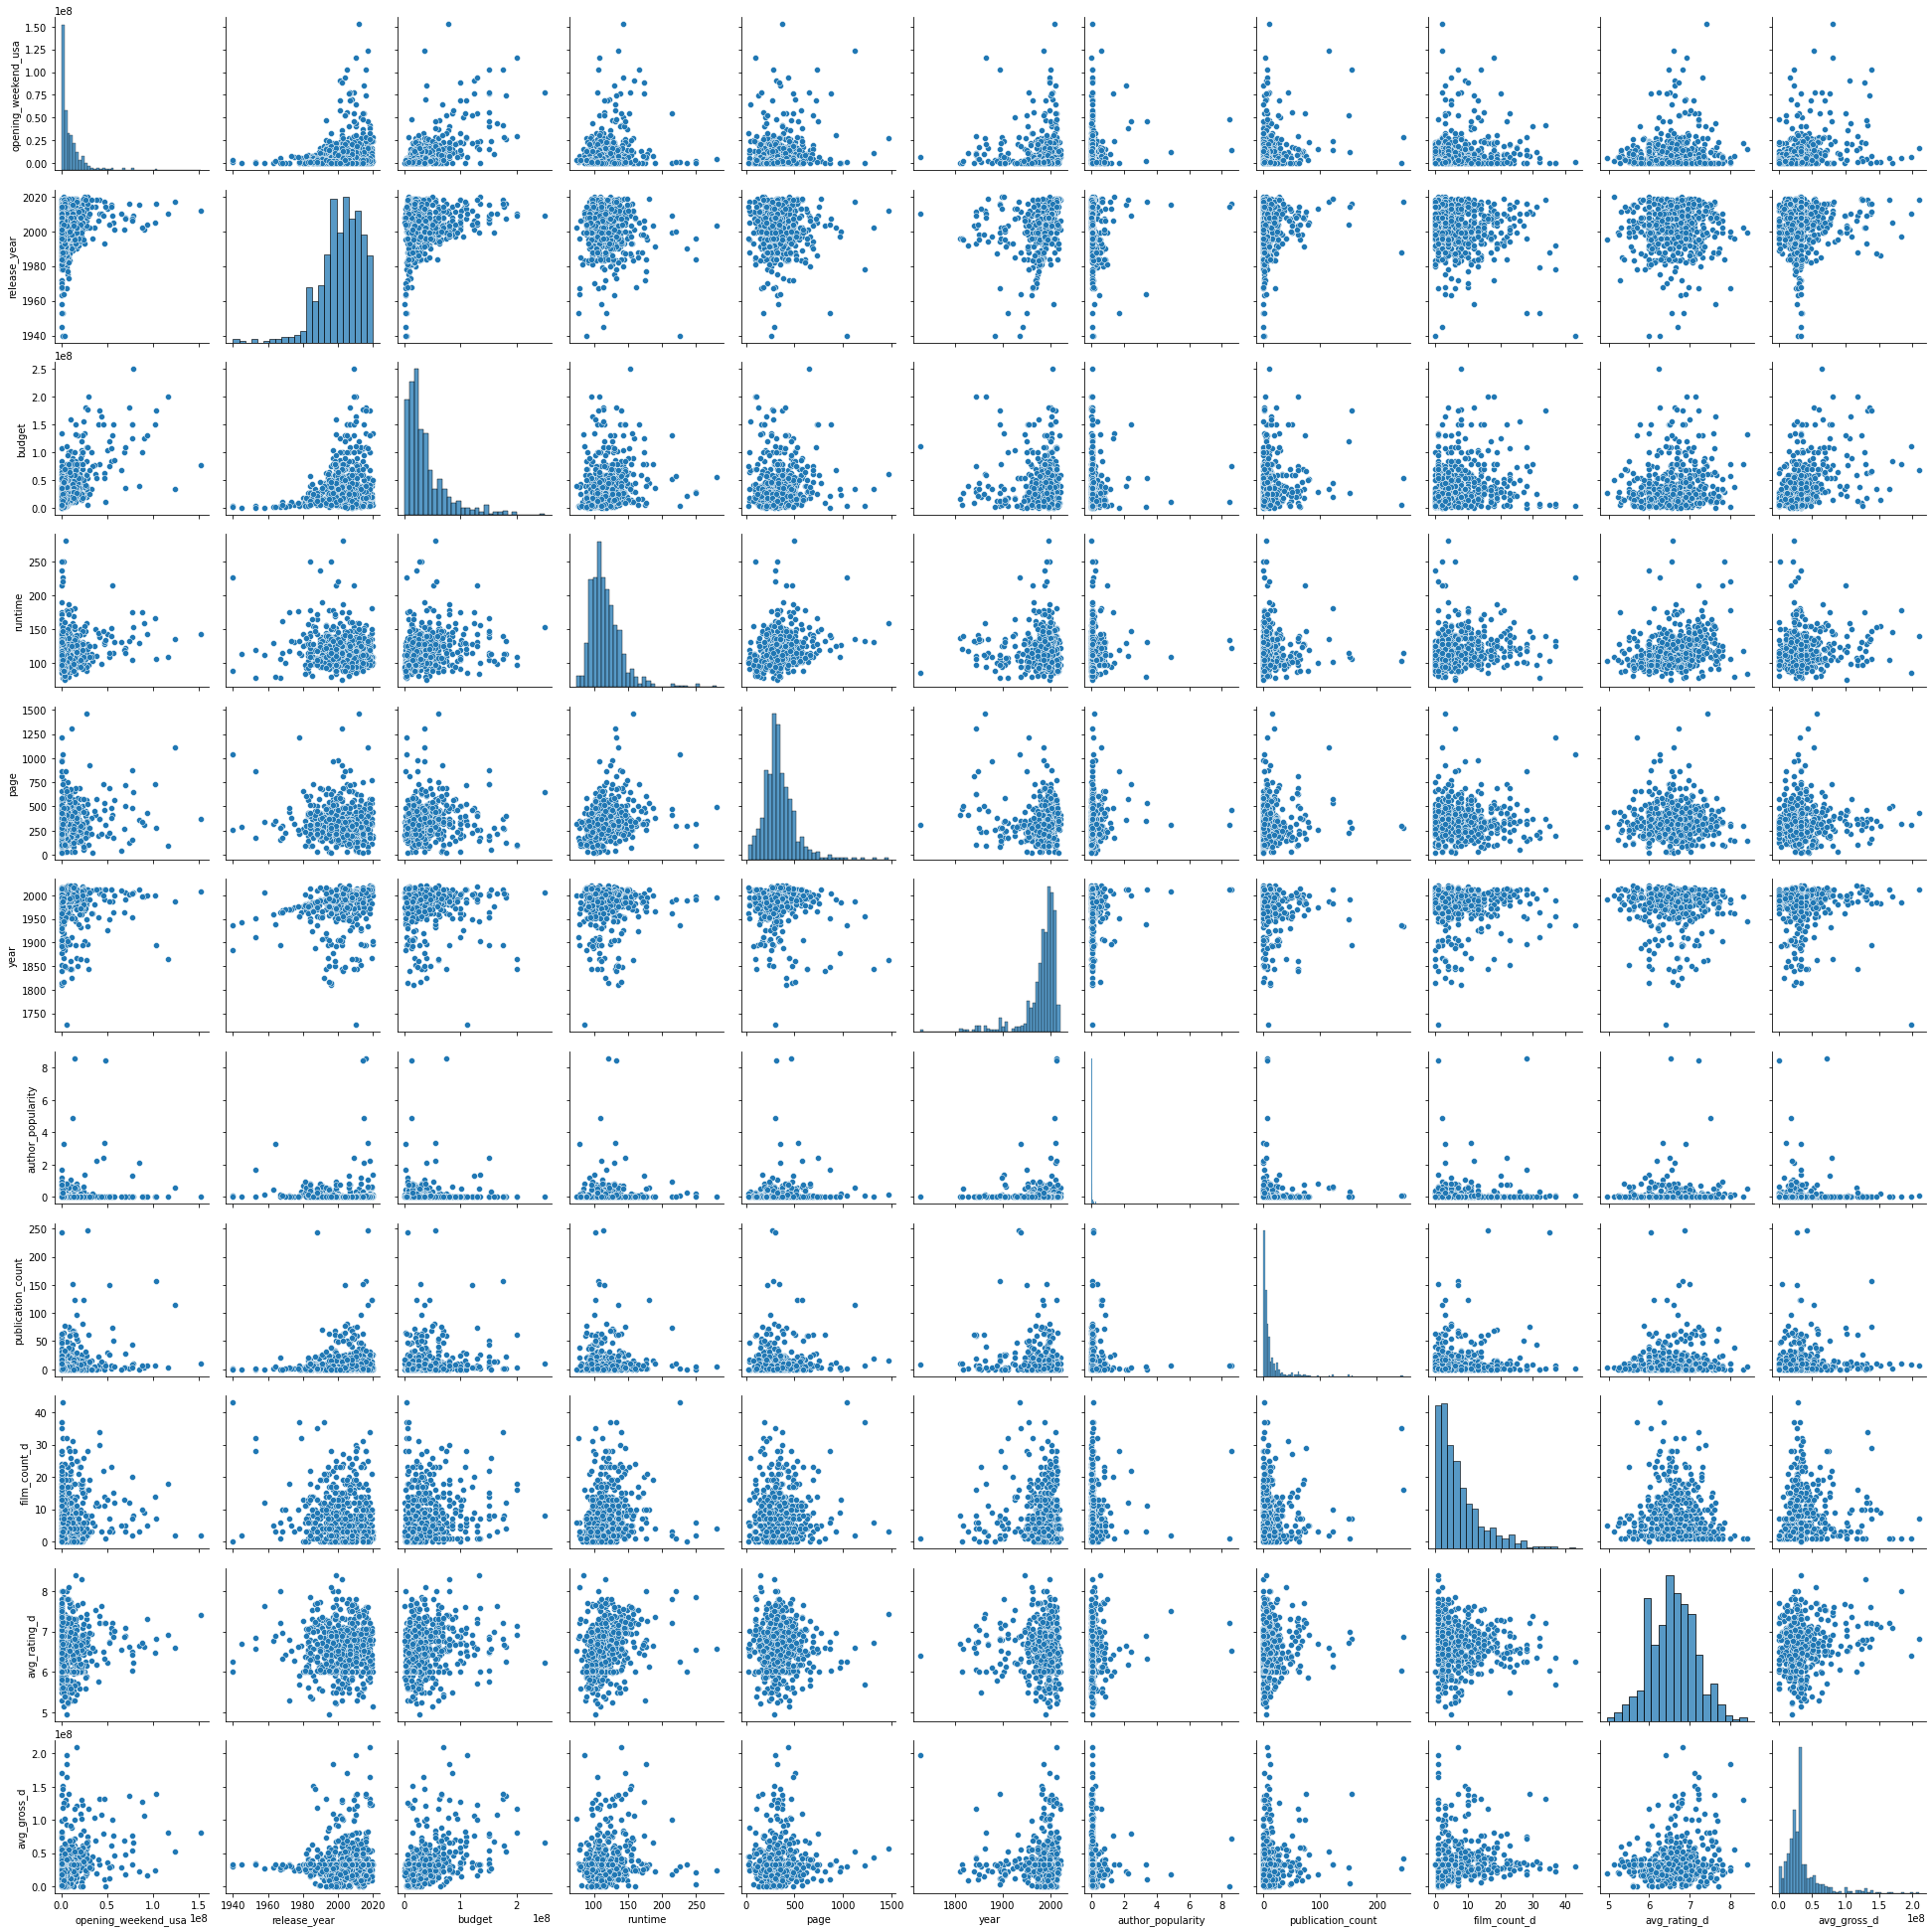

In [740]:
import seaborn as sns
sns.pairplot(all_df[['opening_weekend_usa',\
                     'release_year','budget', 'runtime', 'page', 'year',\
                     'author_popularity', 'publication_count',\
                     'film_count_d','avg_rating_d','avg_gross_d']])

<AxesSubplot:>

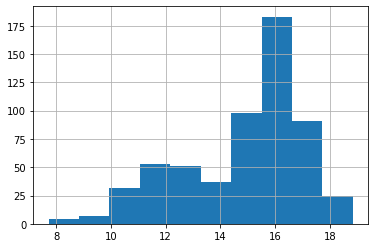

In [763]:
# Take log of opening_weekend_usa as target and graph.
all_df['log_opening_weekend_usa'] = np.log(all_df.opening_weekend_usa)
all_df['log_opening_weekend_usa'].hist()

In [765]:
all_df['log_year'] = np.log(all_df.year)
all_df['log_budget'] = np.log(all_df.budget)
all_df['log_avg_gross_d'] = np.log(all_df.avg_gross_d)

<AxesSubplot:>

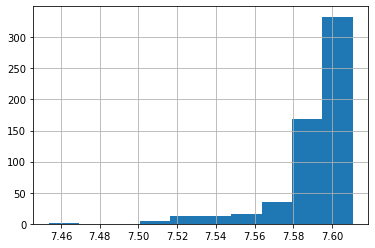

In [766]:
all_df['log_year'].hist()

<AxesSubplot:>

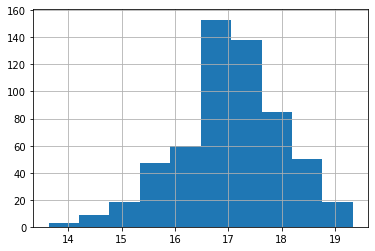

In [767]:
all_df['log_budget'].hist()

<AxesSubplot:>

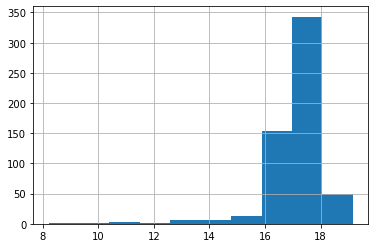

In [768]:
all_df['log_avg_gross_d'].hist()

<AxesSubplot:>

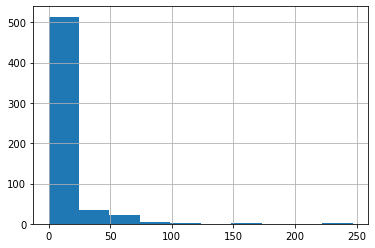

In [781]:
all_df['publication_count'].hist()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 5.5093883366279774] is not finite

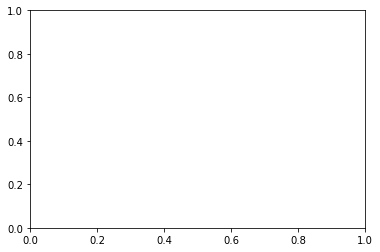

In [782]:
all_df['log_publication_count'] = np.log(all_df.publication_count)
all_df['log_publication_count'].hist()

### Multilabel categorical labels
### 1. genre
Find the top frequent genres and convert the column from list to set in preparation for `MultiLabelBinarizer()`.

In [617]:
# Find the top 10 genre
genre_all = []
for row in all_df.genre:
    genre_all += row
genre_count = []
for genre in set(genre_all):
    genre_count.append({'genre':genre,'count':genre_all.count(genre)})
sorted(genre_count, key = lambda i: i['count'],reverse=True)

[{'genre': 'Drama', 'count': 417},
 {'genre': 'Romance', 'count': 147},
 {'genre': 'Comedy', 'count': 144},
 {'genre': 'Adventure', 'count': 117},
 {'genre': 'Crime', 'count': 115},
 {'genre': 'Action', 'count': 107},
 {'genre': 'Thriller', 'count': 102},
 {'genre': 'Mystery', 'count': 79},
 {'genre': 'Family', 'count': 70},
 {'genre': 'Fantasy', 'count': 65},
 {'genre': 'Sci-Fi', 'count': 43},
 {'genre': 'Horror', 'count': 36},
 {'genre': 'War', 'count': 17},
 {'genre': 'Animation', 'count': 17},
 {'genre': 'History', 'count': 15},
 {'genre': 'Biography', 'count': 13},
 {'genre': 'Music', 'count': 8},
 {'genre': 'Western', 'count': 6},
 {'genre': 'Sport', 'count': 3},
 {'genre': 'Film-Noir', 'count': 1},
 {'genre': 'Musical', 'count': 1}]

In [618]:
# Keep only the top 10 genre
genre_list = ['Drama','Adventure','Comedy','Action','Crime','Romance','Thriller',\
              'Mystery','Family','Fantasy']

In [619]:
# The rest will go to "Other"
all_df['genre']= all_df.genre.apply(lambda x:\
                            [genre if genre in genre_list else 'Other'for genre in x])

In [620]:
# movie_df.head()

In [621]:
# Convert genre column from list to set
all_df['genre'] = all_df.genre.apply(lambda x: set(x))
all_df[['genre']]

,genre
0,"{Crime, Drama}"
1,"{Family, Fantasy, Adventure}"
2,"{Romance, Drama}"
3,"{Romance, Family, Drama}"
4,"{Other, Action, Adventure}"
...,...
580,"{Crime, Drama, Action}"
581,"{Other, Drama}"
582,"{Romance, Drama}"
583,"{Romance, Drama}"


### 2. language

In [622]:
# Find the top 10 language
language_all = []
for row in all_df.language:
    language_all += row
language_count = []
for language in set(language_all):
    language_count.append({'language':language,'count':language_all.count(language)})
sorted(language_count, key = lambda i: i['count'],reverse=True)

[{'language': 'English', 'count': 585},
 {'language': 'French', 'count': 63},
 {'language': 'Spanish', 'count': 45},
 {'language': 'German', 'count': 43},
 {'language': 'Russian', 'count': 34},
 {'language': 'Italian', 'count': 28},
 {'language': 'Arabic', 'count': 13},
 {'language': 'Mandarin', 'count': 12},
 {'language': 'Latin', 'count': 11},
 {'language': 'Japanese', 'count': 11},
 {'language': 'Portuguese', 'count': 6},
 {'language': 'Polish', 'count': 5},
 {'language': 'Hebrew', 'count': 5},
 {'language': 'Greek', 'count': 5},
 {'language': 'Ukrainian', 'count': 5},
 {'language': 'Hindi', 'count': 5},
 {'language': 'Cantonese', 'count': 4},
 {'language': 'Turkish', 'count': 4},
 {'language': 'Danish', 'count': 4},
 {'language': 'Dutch', 'count': 3},
 {'language': 'Swedish', 'count': 3},
 {'language': 'Chinese', 'count': 3},
 {'language': 'Indonesian', 'count': 2},
 {'language': 'Thai', 'count': 2},
 {'language': 'NorthAmericanIndian', 'count': 2},
 {'language': 'AmericanSignLangu

In [623]:
# Keep only the top 6 language
language_list = ['English','French','German','Spanish','Russian','Italian']

In [624]:
# The rest will go to "Other"
all_df['language']= all_df.language.apply(lambda x:\
                            [language if language in language_list else 'Other' for language in x])

In [625]:
# Convert genre column from list to set
all_df['language'] = all_df.language.apply(lambda x: set(x))
all_df[['language']]

,language
0,"{English, Other, Italian}"
1,{English}
2,"{English, French}"
3,"{English, German, French}"
4,{English}
...,...
580,{English}
581,{English}
582,{English}
583,{English}


### 3. country

In [626]:
# Find the top 10 language
country_all = []
for row in all_df.country:
    country_all += row
country_count = []
for country in set(country_all):
    country_count.append({'country':country,'count':country_all.count(country)})
sorted(country_count, key = lambda i: i['count'],reverse=True)

[{'country': 'USA', 'count': 585},
 {'country': 'UK', 'count': 151},
 {'country': 'Germany', 'count': 55},
 {'country': 'France', 'count': 48},
 {'country': 'Canada', 'count': 47},
 {'country': 'Australia', 'count': 15},
 {'country': 'India', 'count': 14},
 {'country': 'Italy', 'count': 13},
 {'country': 'China', 'count': 12},
 {'country': 'Japan', 'count': 10},
 {'country': 'Sweden', 'count': 8},
 {'country': 'Ireland', 'count': 8},
 {'country': 'Mexico', 'count': 7},
 {'country': 'CzechRepublic', 'count': 6},
 {'country': 'NewZealand', 'count': 6},
 {'country': 'Hungary', 'count': 5},
 {'country': 'Spain', 'count': 5},
 {'country': 'Switzerland', 'count': 5},
 {'country': 'Belgium', 'count': 4},
 {'country': 'HongKong', 'count': 4},
 {'country': 'UnitedArabEmirates', 'count': 4},
 {'country': 'Romania', 'count': 3},
 {'country': 'Brazil', 'count': 2},
 {'country': 'Denmark', 'count': 2},
 {'country': 'Russia', 'count': 2},
 {'country': 'Taiwan', 'count': 2},
 {'country': 'Malta', 'co

In [627]:
# Keep only the top 5 country
country_list = ['USA','UK','Germany','France','Canada']

In [628]:
# The rest will go to "Other"
all_df['country']= all_df.country.apply(lambda x:\
                            [country if country in country_list else 'Other' for country in x])

In [629]:
# Convert genre column from list to set
all_df['country'] = all_df.country.apply(lambda x: set(x))
all_df[['country']]

,country
0,{USA}
1,"{UK, USA}"
2,{USA}
3,"{Canada, USA}"
4,"{Other, USA}"
...,...
580,{USA}
581,{USA}
582,"{UK, USA, France}"
583,{USA}


### 4. actor

In [630]:
# Find corresponding value of each authorr when movie is released
# ['publications','author_visibility']


## Train test split

In [743]:
all_df.columns

Index(['index', 'movie_title_x', 'MPAA', 'genre', 'release_date', 'budget',
       'opening_weekend_usa', 'gross_usa', 'gross_world', 'runtime',
       'director_x', 'writer', 'star', 'distributor', 'language', 'country',
       'author_x', 'page', 'year', 'book_popularity', 'author_popularity',
       'release_year', 'film_count_d', 'avg_rating_d', 'avg_gross_d',
       'publication_count', 'log_opening_weekend_usa'],
      dtype='object')

In [792]:
# Train test split
from sklearn.model_selection import train_test_split

X= all_df[['MPAA', 'distributor',\
           'genre', 'language', 'country',\
           'release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d', 'publication_count', 'author_popularity']]

y = all_df['opening_weekend_usa']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [788]:
# Train test split
# Discard 'publication_count', 'author_popularity'
from sklearn.model_selection import train_test_split

X= all_df[['MPAA', 'distributor',\
           'genre', 'language', 'country',\
           'release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d', ]]

y = all_df['opening_weekend_usa']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [783]:
# Train test split
# Try log
from sklearn.model_selection import train_test_split

X= all_df[['MPAA', 'distributor',\
           'genre', 'language', 'country',\
           'release_year', 'log_budget','runtime','page','log_year',\
           'film_count_d', 'avg_rating_d', 'log_avg_gross_d']]

y = all_df['log_opening_weekend_usa']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Preprocessing


### A. Categorical variable preprocessing

### a. OneHotEncoder: for column with single object

#### Transform train set

In [633]:
# Categorical varibale: MPAA
cat_variables = ['MPAA']
X_train_cat = X_train[cat_variables]

In [634]:
# Instantiate a OneHotEncoder object
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, drop='first')
ohe.fit(X_train_cat)
cats = ohe.transform(X_train_cat)

In [635]:
# Create the categorical dataframe
columns = ohe.get_feature_names(cat_variables)
X_train_cat_df = pd.DataFrame(cats, columns = columns, index = X_train_cat.index)
X_train_cat_df.head()

,MPAA_PG,MPAA_PG-13,MPAA_R
25,0.0,0.0,1.0
549,0.0,0.0,1.0
355,0.0,1.0,0.0
226,0.0,0.0,1.0
50,0.0,1.0,0.0


In [636]:
# Test MPAA, distributor
cat_variables = ['MPAA','distributor']
X_train_cat = X_train[cat_variables]

In [637]:
# Instantiate a OneHotEncoder object
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, drop='first')
ohe.fit(X_train_cat)
cats = ohe.transform(X_train_cat)

In [638]:
# Create the categorical dataframe
columns = ohe.get_feature_names(cat_variables)
X_train_cat_df = pd.DataFrame(cats, columns = columns, index = X_train_cat.index)
X_train_cat_df.head()

,MPAA_PG,MPAA_PG-13,MPAA_R,distributor_Other,distributor_ParamountPictures,distributor_TwentiethCenturyFox,distributor_UniversalPictures,distributor_WarnerBros.
25,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
549,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
355,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
226,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
50,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Repeat transformations for testing set

In [639]:
X_test_cat = X_test[cat_variables]

cats_test = ohe.transform(X_test_cat)                           # REMBER ONLY TRANSFORM ON TEST SET

cat_columns = ohe.get_feature_names(cat_variables)
X_test_cat_df = pd.DataFrame(cats_test, columns=cat_columns, index=X_test_cat.index)
X_test_cat_df.head()

,MPAA_PG,MPAA_PG-13,MPAA_R,distributor_Other,distributor_ParamountPictures,distributor_TwentiethCenturyFox,distributor_UniversalPictures,distributor_WarnerBros.
94,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
334,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
124,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
88,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
478,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### b. MultiLabelBinarizer: for column with list object

#### Transform train set

In [640]:
# Instantiate a MultiLabelBinarizer object
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

In [641]:
multilabel_variables = ['genre']
X_train_cats = X_train[multilabel_variables]

In [642]:
X_train_cats

,genre
25,"{Thriller, Drama, Action}"
549,"{Crime, Drama, Action}"
355,"{Comedy, Mystery, Drama}"
226,"{Comedy, Romance, Drama}"
50,"{Family, Fantasy, Adventure}"
...,...
165,"{Thriller, Action}"
116,"{Comedy, Drama}"
449,"{Thriller, Crime, Drama}"
570,"{Thriller, Drama}"


In [643]:
# Test on genre column first
multilabel_variables = ['genre']
X_train_cats = X_train[multilabel_variables]
X_train_cats_df1 = pd.DataFrame(mlb.fit_transform(X_train_cats['genre']),\
                               columns=mlb.classes_, index=X_train_cats.index)
X_train_cats_df1.drop(columns='Other',inplace=True)

In [644]:
mlb.classes_

array(['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'Mystery', 'Other', 'Romance', 'Thriller'], dtype=object)

In [645]:
X_train_cats_df1

,Action,Adventure,Comedy,Crime,Drama,Family,Fantasy,Mystery,Romance,Thriller
25,1,0,0,0,1,0,0,0,0,1
549,1,0,0,1,1,0,0,0,0,0
355,0,0,1,0,1,0,0,1,0,0
226,0,0,1,0,1,0,0,0,1,0
50,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
165,1,0,0,0,0,0,0,0,0,1
116,0,0,1,0,1,0,0,0,0,0
449,0,0,0,1,1,0,0,0,0,1
570,0,0,0,0,1,0,0,0,0,1


In [646]:
# Test on language column
multilabel_variables = ['language']
X_train_cats = X_train[multilabel_variables]
X_train_cats_df2 = pd.DataFrame(mlb.fit_transform(X_train_cats['language']),\
                               columns=mlb.classes_, index=X_train_cats.index)
X_train_cats_df2.drop(columns='Other',inplace=True)

In [647]:
mlb.classes_

array(['English', 'French', 'German', 'Italian', 'Other', 'Russian',
       'Spanish'], dtype=object)

In [648]:
# Test on country column
multilabel_variables = ['country']
X_train_cats = X_train[multilabel_variables]
X_train_cats_df3 = pd.DataFrame(mlb.fit_transform(X_train_cats['country']),\
                               columns=mlb.classes_, index=X_train_cats.index)
X_train_cats_df3.drop(columns='Other',inplace=True)

In [649]:
mlb.classes_

array(['Canada', 'France', 'Germany', 'Other', 'UK', 'USA'], dtype=object)

In [650]:
# Merge all df1, df2, df3
df12 = pd.merge(X_train_cats_df1,X_train_cats_df2,left_index=True,right_index=True,how='left')

In [651]:
df123 = pd.merge(df12,X_train_cats_df3,left_index=True,right_index=True,how='left')

In [652]:
df123

,Action,Adventure,Comedy,Crime,Drama,Family,Fantasy,Mystery,Romance,Thriller,...,French,German,Italian,Russian,Spanish,Canada,France,Germany,UK,USA
25,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
549,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
355,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
226,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,1,1,1
50,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
116,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
449,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
570,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [653]:
# # Test on all multilabel columns????
# multilabel_variables = ['genre','language','country']
# X_train_cats = X_train[multilabel_variables]
# tempdf = pd.get_dummies(X_train_cats, columns=multilabel_variables)

In [654]:
# X_train_cats = X_train[multilabel_variables]
# X_train_cats_df = pd.DataFrame(mlb.fit_transform(X_train_cats['genre','language','country']),\
#                                columns=mlb.classes_, index=X_train_cats.index)
# X_train_cats_df.drop(columns='Other',inplace=True)

#### Repeat transformations for testing set

In [655]:
# Test on genre column first
multilabel_variables = ['genre']
X_test_cats = X_test[multilabel_variables]
X_test_cats_df1 = pd.DataFrame(mlb.fit_transform(X_test_cats['genre']),\
                               columns=mlb.classes_, index=X_test_cats.index)
X_test_cats_df1.drop(columns='Other',inplace=True)

In [656]:
# Test on language column
multilabel_variables = ['language']
X_test_cats = X_test[multilabel_variables]
X_test_cats_df2 = pd.DataFrame(mlb.fit_transform(X_test_cats['language']),\
                               columns=mlb.classes_, index=X_test_cats.index)
X_test_cats_df2.drop(columns='Other',inplace=True)

In [657]:
# Test on country column
multilabel_variables = ['country']
X_test_cats = X_test[multilabel_variables]
X_test_cats_df3 = pd.DataFrame(mlb.fit_transform(X_test_cats['country']),\
                               columns=mlb.classes_, index=X_test_cats.index)
X_test_cats_df3.drop(columns='Other',inplace=True)

In [658]:
# Merge all df1, df2, df3
df12_test = pd.merge(X_test_cats_df1,X_test_cats_df2,left_index=True,right_index=True,how='left')
df123_test = pd.merge(df12_test,X_test_cats_df3,left_index=True,right_index=True,how='left')

### B. Continuous variable preprocessing

In [793]:
# Select continuous variables from training set
X_train_cont = X_train[['release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d', 'publication_count', 'author_popularity']]

X_train_cont.head()

,release_year,budget,runtime,page,year,film_count_d,avg_rating_d,avg_gross_d,publication_count,author_popularity
421,1986,25000000.0,117.0,384.0,1981.0,14,6.328571,27034032,11,0.0135
399,1964,3000000.0,79.0,352.0,1938.0,3,6.900000,32634196,5,3.3155
124,2017,35000000.0,119.0,32.0,1978.0,6,6.533333,26134707,17,0.0020
498,2000,6000000.0,95.0,128.0,1995.0,1,5.600000,25000,3,0.0599
113,1995,30000000.0,133.0,276.0,1979.0,3,6.866667,22398530,8,0.2721


### Standardize continuous variables
#### Start with train set

In [794]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train_cont)
X_train_scaled = ss.transform(X_train_cont)

cont_columns = X_train_cont.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cont_columns, index=X_train_cont.index)

X_train_scaled_df.head()

,release_year,budget,runtime,page,year,film_count_d,avg_rating_d,avg_gross_d,publication_count,author_popularity
421,-1.262216,-0.328596,-0.007069,0.223784,-0.029234,0.952420,-0.500952,-0.285607,-0.062335,-0.232603
399,-3.041379,-0.966787,-1.584841,0.038062,-1.200464,-0.610149,0.565248,-0.092756,-0.308491,5.581346
124,1.244787,-0.038510,0.075971,-1.819155,-0.110948,-0.183994,-0.118897,-0.316577,0.183821,-0.252852
498,-0.130021,-0.879761,-0.920516,-1.261990,0.352097,-0.894252,-1.860356,-1.215706,-0.390543,-0.150905
113,-0.534376,-0.183553,0.657256,-0.403027,-0.083710,-0.610149,0.503053,-0.445238,-0.185413,0.222723


#### Repeat for test set

In [795]:
X_test_cont = X_test[['release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d', 'publication_count', 'author_popularity']]


X_test_scaled = ss.transform(X_test_cont)

cont_columns = X_test_cont.columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=cont_columns, index=X_test_cont.index)

X_test_scaled_df.head()

,release_year,budget,runtime,page,year,film_count_d,avg_rating_d,avg_gross_d,publication_count,author_popularity
85,-0.696119,-0.154544,1.612223,-0.942780,-0.356089,-0.326045,1.274270,1.299452,-0.513621,-0.242111
90,0.840432,1.905070,0.698776,0.949260,0.597238,0.526265,0.836644,-0.692136,-0.103361,0.613430
532,0.436076,-0.966787,-1.335719,-0.960192,0.651714,1.236524,-0.146107,-0.331915,-0.308491,-0.243872
304,1.002174,0.686707,0.034451,2.336369,0.025242,-1.036304,-1.114016,-0.092756,0.142795,-0.256197
125,1.002174,-0.705709,0.657256,-0.188286,0.815142,-0.894252,1.125002,-1.213775,-0.267465,14.642093


In [755]:
X_test_scaled_df.shape

(117, 10)

In [ ]:
# Try discard 'publication_count', 'author_popularity'

In [790]:
# Train set
# Select continuous variables from training set
X_train_cont = X_train[['release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d']]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train_cont)
X_train_scaled = ss.transform(X_train_cont)

cont_columns = X_train_cont.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cont_columns, index=X_train_cont.index)



# Test set
X_test_cont = X_test[['release_year', 'budget','runtime','page','year',\
           'film_count_d', 'avg_rating_d', 'avg_gross_d']]


X_test_scaled = ss.transform(X_test_cont)

cont_columns = X_test_cont.columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=cont_columns, index=X_test_cont.index)


In [ ]:
# Try for log_ variables

In [784]:
# Train set
# Select continuous variables from training set
X_train_cont = X_train[['release_year', 'log_budget','runtime','page','log_year',\
           'film_count_d', 'avg_rating_d', 'log_avg_gross_d']]

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train_cont)
X_train_scaled = ss.transform(X_train_cont)

cont_columns = X_train_cont.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cont_columns, index=X_train_cont.index)

X_train_scaled_df.head()

,release_year,log_budget,runtime,page,log_year,film_count_d,avg_rating_d,log_avg_gross_d
38,0.955878,1.515656,1.077825,-0.853609,-1.412054,0.835147,-0.677624,0.288662
564,-0.462275,-0.501819,0.614721,0.988435,0.194075,0.835147,0.219112,0.052311
579,-1.259987,-0.645011,-0.564091,-0.151878,0.143873,-0.584817,0.204878,1.333723
353,-1.880429,-0.810313,-1.448200,-1.461776,0.018149,-1.010806,-1.090407,0.220984
512,0.424071,0.241472,-0.521991,0.795459,0.519157,1.403132,-0.001932,0.434482


In [785]:
# Test set
X_test_cont = X_test[['release_year', 'log_budget','runtime','page','log_year',\
           'film_count_d', 'avg_rating_d', 'log_avg_gross_d']]


X_test_scaled = ss.transform(X_test_cont)

cont_columns = X_test_cont.columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=cont_columns, index=X_test_cont.index)

X_test_scaled_df.head()

,release_year,log_budget,runtime,page,log_year,film_count_d,avg_rating_d,log_avg_gross_d
475,-1.791794,-0.375516,0.783122,-0.303920,-0.082659,-0.016831,0.548525,-0.111385
19,-0.994083,-0.317537,0.867323,0.438746,0.194075,0.551154,-0.232491,-0.550527
580,-1.614525,-1.388302,-0.900895,0.514767,0.866891,2.113114,-0.198847,0.267189
288,0.778609,-0.210213,-0.732493,-1.531950,0.742978,-0.584817,-0.165204,0.583910
447,-0.196371,0.720045,1.162026,0.620027,0.394376,0.835147,0.717298,-0.241043


## Combine the categorical and continuous features for train/test set

#### Start with train set

In [663]:
# A (single label categorical)
X_train_cat_df

,MPAA_PG,MPAA_PG-13,MPAA_R,distributor_Other,distributor_ParamountPictures,distributor_TwentiethCenturyFox,distributor_UniversalPictures,distributor_WarnerBros.
25,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
549,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
355,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
226,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
50,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
165,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
116,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
449,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
570,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [664]:
# B (multi label categorical)
df123

,Action,Adventure,Comedy,Crime,Drama,Family,Fantasy,Mystery,Romance,Thriller,...,French,German,Italian,Russian,Spanish,Canada,France,Germany,UK,USA
25,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
549,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
355,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
226,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,1,1,1
50,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,1
116,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
449,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
570,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [665]:
# A+B
X_train_cat_df_all = X_train_cat_df.merge(df123,left_index=True, right_index=True)

In [666]:
# A+B + cont
X_train_combined = pd.concat([X_train_cat_df_all, X_train_scaled_df], axis='columns')

X_train_combined.head()

,MPAA_PG,MPAA_PG-13,MPAA_R,distributor_Other,distributor_ParamountPictures,distributor_TwentiethCenturyFox,distributor_UniversalPictures,distributor_WarnerBros.,Action,Adventure,...,release_year,budget,runtime,page,year,film_count_d,avg_rating_d,avg_gross_d,publication_count,author_popularity
25,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,...,1.370777,0.840410,1.250562,0.511422,0.851520,-0.051876,0.463933,5.830257,-0.208800,-0.127472
549,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,...,-1.174952,-0.756226,-0.720021,0.406348,0.083471,-0.458770,1.184254,-0.424265,-0.330999,-0.198124
355,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,...,1.124416,-0.676394,-0.720021,-0.241604,0.719098,-0.730032,1.683936,-0.600040,-0.249533,7.378788
226,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,...,0.221093,0.068703,-0.720021,0.032754,0.480738,-0.187507,-0.526779,-0.349186,-0.290266,-0.220223
50,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,...,1.206536,3.794187,1.250562,-1.274824,0.533707,0.626280,0.078897,3.347718,-0.453198,-0.221623


In [667]:
X_train_combined.shape

(468, 39)

#### Repeat for test set

In [672]:
# A+B
X_test_cat_df_all = X_test_cat_df.merge(df123_test,left_index=True, right_index=True)
# A+B + cont
X_test_combined = pd.concat([X_test_cat_df_all, X_test_scaled_df], axis='columns')

X_test_combined.head()

,MPAA_PG,MPAA_PG-13,MPAA_R,distributor_Other,distributor_ParamountPictures,distributor_TwentiethCenturyFox,distributor_UniversalPictures,distributor_WarnerBros.,Action,Adventure,...,release_year,budget,runtime,page,year,film_count_d,avg_rating_d,avg_gross_d,publication_count,author_popularity
94,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0,...,1.288657,-0.064350,-0.720021,-1.508321,0.109956,0.897543,-1.106497,0.660579,-0.493931,-0.221935
334,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,...,-1.914034,-0.902584,-0.720021,-0.761133,-0.684578,-0.458770,-1.223305,-0.380909,-0.493931,-0.142879
124,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,...,1.288657,-0.064350,-0.720021,-1.835215,-0.075435,-0.187507,-0.072522,-0.326384,0.198530,-0.219133
88,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,...,1.370777,2.463657,1.250562,-0.527637,0.983943,-0.323139,-0.024068,2.937019,-0.371732,-0.221156
478,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,...,0.056853,-0.064350,1.250562,-0.037295,-2.088253,-0.458770,2.229044,-0.400107,-0.412465,-0.222090


In [673]:
X_test_combined.shape

(117, 39)

## Instantiate the Linear Regression Model and make Predictions

### Fit and predict

In [749]:
# Test with continuous variable only
lr = LinearRegression()

lr.fit(X_train_scaled_df, y_train)

y_pred = lr.predict(X_test_scaled_df)

y_pred

array([ 1.53558000e+07,  3.13832134e+07,  1.37805493e+07,  1.94582157e+07,
        4.97019231e+06, -1.12083198e+07,  2.10159719e+07,  1.07096703e+07,
        1.26076015e+07,  1.66310258e+07,  2.25402566e+07,  6.56466731e+06,
        2.39121047e+06,  3.20184868e+07,  2.41874835e+07,  5.34906117e+06,
        9.31502580e+06,  1.90050155e+07,  2.12503995e+07,  1.89542405e+06,
        1.82855573e+06,  7.08460434e+06,  9.23254148e+05,  1.76583692e+07,
        3.11055809e+07,  1.29130634e+04,  2.43487783e+07,  1.31054003e+07,
        6.69958751e+06,  6.39227300e+06,  8.50023757e+06,  7.84554050e+07,
        1.28891227e+07,  6.29813379e+06,  1.12036869e+07,  1.89604125e+07,
        2.36860430e+07,  1.90057311e+07,  1.21952046e+07,  6.66475584e+06,
       -2.26157565e+06,  6.30651256e+06,  9.06717907e+06,  4.25980716e+07,
        3.15183740e+06,  1.76824592e+07,  3.73948927e+06,  5.58453647e+06,
        2.62295609e+06,  9.18869299e+06,  3.00975142e+05, -7.26953938e+05,
        1.31064871e+07,  

In [750]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 12197564.00
r2: 0.41


In [796]:
# Test with continuous variable only again
lr = LinearRegression()

lr.fit(X_train_scaled_df, y_train)

y_pred = lr.predict(X_test_scaled_df)

y_pred

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 19117967.80
r2: 0.42


In [791]:
# Test with continuous variable only
# Discard publication and author popularity
lr = LinearRegression()

lr.fit(X_train_scaled_df, y_train)

y_pred = lr.predict(X_test_scaled_df)

y_pred

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 17024727.25
r2: 0.25


In [787]:
# Test with continuous variable only
# Target changed to np.log('opening_weekend_usa')
lr = LinearRegression()

lr.fit(X_train_scaled_df, y_train)

y_pred = lr.predict(X_test_scaled_df)

y_pred

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 1.80
r2: 0.37


In [ ]:
# Fit and predict on all data
lr = LinearRegression()

lr.fit(X_train_combined, y_train)

y_pred = lr.predict(X_test_combined)

y_pred

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

### Evaluate

In [675]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 13528591.10
r2: 0.36


In [676]:
score = lr.score(X_test_combined, y_test) 
score

0.359546525308269

### Coefficients

In [677]:
feature_names = X_test_combined.columns

coefficient_values = np.round(lr.coef_, 3)

feats_values = list(zip(feature_names, coefficient_values)) 

sorted(feats_values, key=lambda x: x[1])

[('Drama', -4831693.902),
 ('MPAA_R', -3916730.524),
 ('France', -2502437.044),
 ('Action', -2478448.703),
 ('Comedy', -2351335.561),
 ('Germany', -2106556.488),
 ('French', -2075510.722),
 ('Russian', -2014770.31),
 ('MPAA_PG', -1346310.354),
 ('MPAA_PG-13', -1146857.645),
 ('Crime', -1046427.011),
 ('film_count_d', -644713.058),
 ('German', -112789.446),
 ('English', -0.0),
 ('USA', 0.0),
 ('avg_rating_d', 36258.809),
 ('avg_gross_d', 51531.723),
 ('UK', 124392.402),
 ('Mystery', 831771.338),
 ('Romance', 1155516.423),
 ('author_popularity', 1396751.458),
 ('Adventure', 1435228.017),
 ('release_year', 1488053.29),
 ('year', 1550350.476),
 ('runtime', 1565868.316),
 ('Canada', 1651863.863),
 ('page', 1689371.948),
 ('Thriller', 1891829.626),
 ('Fantasy', 1924614.53),
 ('Italian', 1940623.061),
 ('Spanish', 2569930.98),
 ('publication_count', 2795405.815),
 ('Family', 4195644.014),
 ('distributor_Other', 4781721.9),
 ('distributor_UniversalPictures', 6216994.159),
 ('distributor_Paramo

## Visualization

In [ ]:
# Reminder
# X= all_df[['MPAA', 'distributor',\
#            'genre', 'language', 'country',\
#            'release_year', 'budget','runtime','page','year',\
#            'film_count_d', 'avg_rating_d', 'avg_gross_d', 'publication_count', 'author_popularity']]

# y = all_df['opening_weekend_usa']
# y_pred

In [ ]:
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

In [804]:
y_pred.shape

(117,)

In [805]:
y_test.shape

(117,)

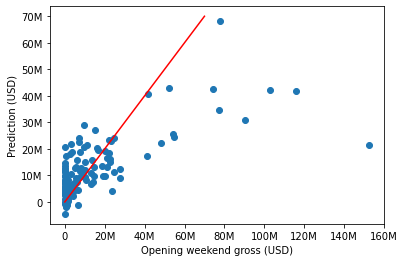

In [819]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
plt.scatter(y_test, y_pred)

ax.set_xlabel('Opening weekend gross (USD)')
ax.set_ylabel('Prediction (USD)')

ax.set_xticks([0,0.2e8,0.4e8,0.6e8,0.8e8,1e8,1.2e8,1.4e8,1.6e8])
ax.set_xticklabels(['0','20M','40M','60M','80M','100M','120M','140M','160M'])
ax.set_yticks([0,0.1e8,0.2e8,0.3e8,0.4e8,0.5e8,0.6e8,0.7e8])
ax.set_yticklabels(['0','10M','20M','30M','40M','50M','60M','70M'])

x=np.linspace(0,0.7e8,50)
y=x
plt.plot(x,y,color='red')

In [796]:
# Test with continuous variable only again
lr = LinearRegression()
lr.fit(X_train_scaled_df, y_train)
y_pred = lr.predict(X_test_scaled_df)
y_pred
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 19117967.80
r2: 0.42


### OneHotEncoder with list item (e.g. genre)

In [158]:
# Example
d = {'A': [[5,7], [3, 4, 5], [2], [1,2,3,4]]}
df = pd.DataFrame(data=d)
df

,A
0,"[5, 7]"
1,"[3, 4, 5]"
2,[2]
3,"[1, 2, 3, 4]"


In [91]:
# Use MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
df_ohe = pd.DataFrame(mlb.fit_transform(df['A']),columns = mlb.classes_, index=df.index)
df_ohe

,1,2,3,4,5,7
0,0,0,0,0,1,1
1,0,0,1,1,1,0
2,0,1,0,0,0,0
3,1,1,1,1,0,0


In [291]:
# Test on genre
cat_variable = ['genre']
X_train_cat = X_train[cat_variable]

In [292]:
X_train_cat

,genre
201,"{Romance, Drama}"
14,"{Mystery, Crime, Drama}"
190,"{Family, Fantasy, Adventure}"
20,"{Fantasy, Crime, Drama}"
533,"{Fantasy, Family, Drama}"
...,...
385,"{Comedy, Fantasy, Drama}"
295,"{Mystery, Crime, Drama}"
386,"{Romance, Fantasy, Drama}"
208,"{Other, Thriller, Drama}"


In [293]:
X_train_cat_test = X_train_cat.iloc[:3,:].copy()
X_train_cat_test

,genre
201,"{Romance, Drama}"
14,"{Mystery, Crime, Drama}"
190,"{Family, Fantasy, Adventure}"


In [294]:
X_train_cat_set = X_train_cat.copy()

In [144]:
def list_set(my_list):
    return set(my_list)

<ipython-input-289-bae5efa517bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat['genre_clean']= X_train_cat_set.genre.apply(lambda x:\


In [295]:
X_train_cat_set

,genre
201,"{Romance, Drama}"
14,"{Mystery, Crime, Drama}"
190,"{Family, Fantasy, Adventure}"
20,"{Fantasy, Crime, Drama}"
533,"{Fantasy, Family, Drama}"
...,...
385,"{Comedy, Fantasy, Drama}"
295,"{Mystery, Crime, Drama}"
386,"{Romance, Fantasy, Drama}"
208,"{Other, Thriller, Drama}"


In [297]:
X_train_cat_df = pd.DataFrame(mlb.fit_transform(X_train_cat_set['genre']),\
                              columns=mlb.classes_,index=X_train_cat_set.index)
X_train_cat_df.drop(columns='Other',inplace=True)

In [298]:
X_train_cat_df

,Action,Adventure,Comedy,Crime,Drama,Family,Fantasy,Mystery,Romance,Thriller
201,0,0,0,0,1,0,0,0,1,0
14,0,0,0,1,1,0,0,1,0,0
190,0,1,0,0,0,1,1,0,0,0
20,0,0,0,1,1,0,1,0,0,0
533,0,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
385,0,0,1,0,1,0,1,0,0,0
295,0,0,0,1,1,0,0,1,0,0
386,0,0,0,0,1,0,1,0,1,0
208,0,0,0,0,1,0,0,0,0,1


In [299]:
len(mlb.classes_),mlb.classes_

(11,
 array(['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Family',
        'Fantasy', 'Mystery', 'Other', 'Romance', 'Thriller'], dtype=object))

In [263]:
X_train_cat_df.sum(axis=0).sort_values(ascending=False)

Drama        491
Other        224
Adventure    191
Comedy       188
Action       175
Crime        155
Romance      152
Thriller     137
Mystery       98
Family        98
Fantasy       92
dtype: int64